##### Libraries

---



In [228]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import History 
from tensorflow.keras.utils import to_categorical
from sklearn import metrics
import urllib.request
from keras.datasets import cifar10
from keras import backend as K
from time import time
import seaborn as sns
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

##### Load Data
---



In [229]:
# load data

((x, y), (x_test, y_test)) = cifar10.load_data()
x = x/255
x_test = x_test/255

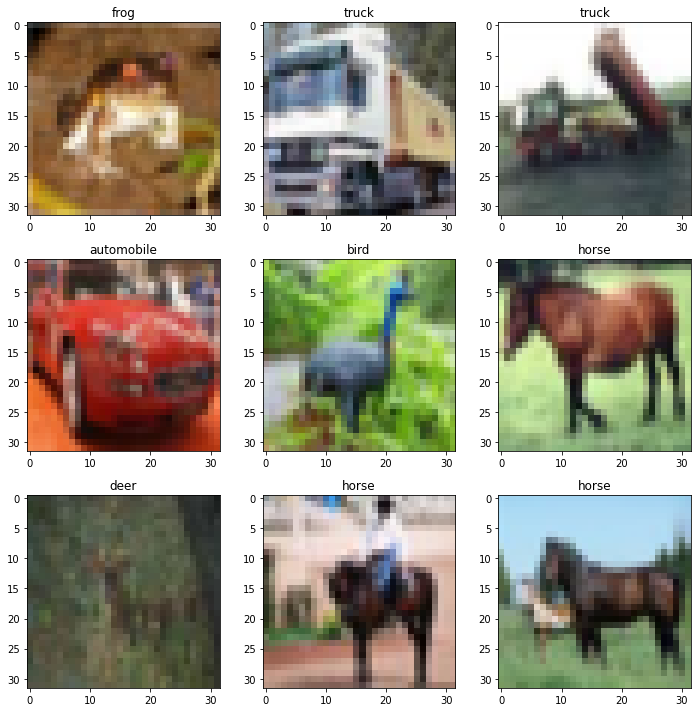

In [230]:
# show some of the pictures and their labels

labels = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
          5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

fig, axs = plt.subplots(3,3)
fig.set_figheight(10)
fig.set_figwidth(10)

for i in range(3):
  for j in range(3):
    axs[i,j].imshow(x[5*i+j])
    axs[i,j].title.set_text(labels[y[:,0][5*i+j]])
fig.tight_layout()

In [231]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.1, random_state=101)

In [232]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
y_valid = to_categorical(y_valid,10)

##### Training

In [214]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [215]:
# Create the model

history = History()

model = Sequential()
model.add(Flatten(input_shape=x_train[0].shape))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

# Configure the model and start training
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', f1_m,precision_m, recall_m])

K.set_value(model.optimizer.learning_rate, 0.0001)
start = time()

model.fit(x=x_train,y=y_train,
          validation_data=(x_valid,y_valid),
          batch_size=256,epochs=15, verbose=2,
          callbacks=[history])
print("training time consumption = %.2f" %(time()-start), 'sec')

Epoch 1/15
176/176 - 1s - loss: 1.8756 - accuracy: 0.3282 - f1_m: 0.0704 - precision_m: 0.4297 - recall_m: 0.0803 - val_loss: 1.7275 - val_accuracy: 0.4044 - val_f1_m: 0.0227 - val_precision_m: 0.5505 - val_recall_m: 0.0117
Epoch 2/15
176/176 - 1s - loss: 1.6781 - accuracy: 0.4085 - f1_m: 0.0213 - precision_m: 0.5784 - recall_m: 0.0109 - val_loss: 1.6470 - val_accuracy: 0.4290 - val_f1_m: 0.0149 - val_precision_m: 0.6436 - val_recall_m: 0.0076
Epoch 3/15
176/176 - 1s - loss: 1.5924 - accuracy: 0.4386 - f1_m: 0.0198 - precision_m: 0.6659 - recall_m: 0.0101 - val_loss: 1.6153 - val_accuracy: 0.4384 - val_f1_m: 0.0150 - val_precision_m: 0.6483 - val_recall_m: 0.0076
Epoch 4/15
176/176 - 1s - loss: 1.5377 - accuracy: 0.4569 - f1_m: 0.0188 - precision_m: 0.7269 - recall_m: 0.0096 - val_loss: 1.5711 - val_accuracy: 0.4514 - val_f1_m: 0.0191 - val_precision_m: 0.7407 - val_recall_m: 0.0097
Epoch 5/15
176/176 - 1s - loss: 1.4948 - accuracy: 0.4744 - f1_m: 0.0208 - precision_m: 0.7507 - recall_

In [216]:
print(model.summary())
loss, acc, f1_score, precision, recall= model.evaluate(x_test, y_test, verbose=0)
print('test loss = ', loss)
print('test accuracy = ', acc)
print('F1 Score = ', f1_score)
print('Precision = ', precision)
print('Recall = ', recall)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 1000)              3073000   
_________________________________________________________________
dense_16 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_17 (Dense)             (None, 10)                10010     
Total params: 4,084,010
Trainable params: 4,084,010
Non-trainable params: 0
_________________________________________________________________
None
test loss =  1.3603986501693726
test accuracy =  0.5187000036239624
F1 Score =  0.007135816849768162
Precision =  0.11022362858057022
Recall =  0.00369408936239779


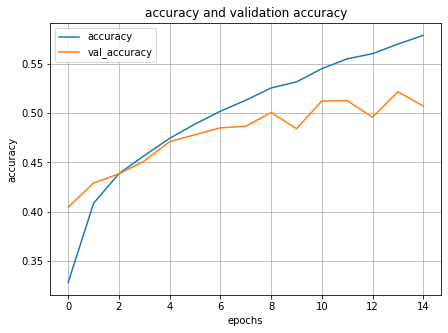

In [217]:
acc = pd.DataFrame({'accuracy':history.history['accuracy'],
                     'val_accuracy':history.history['val_accuracy']})
acc.plot(figsize=(7,5))
plt.xlabel('epochs'), plt.ylabel('accuracy'), plt.title('accuracy and validation accuracy')
plt.grid()

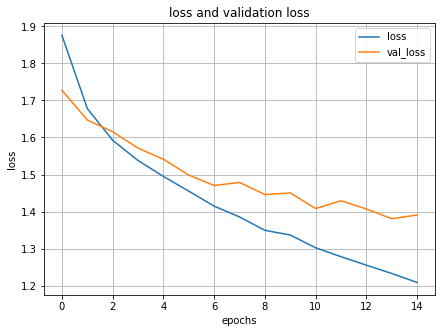

In [218]:
los = pd.DataFrame({'loss':history.history['loss'],
                     'val_loss':history.history['val_loss']})
los.plot(figsize=(7,5))
plt.xlabel('epochs'), plt.ylabel('loss'), plt.title('loss and validation loss')
plt.grid()

Text(42.0, 0.5, 'True label')

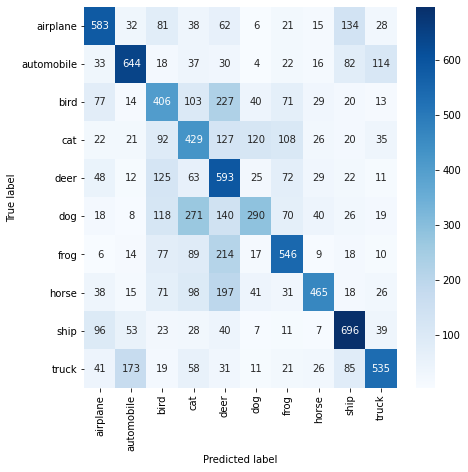

In [219]:
lbls = list(labels.values())
prediction = model.predict(x_test)
matrix  = metrics.confusion_matrix(y_test.argmax(axis=1), prediction.argmax(axis=1))
confusion = pd.DataFrame(matrix, index=lbls, columns=lbls)

plt.figure(figsize=(7,7))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')

##### imbalanced dataset

In [233]:
x_train_unbalance = x_train

In [234]:
def class_count(x, y, _classes, target):

  cls = list(_classes.keys())[list(_classes.values()).index(target)]
  cnt = 0
  cls_indx = []
  train_num = int(x.shape[0]) 

  for i in range(train_num):
    if np.argmax(y[i]) == cls:
      cnt+=1
      cls_indx.append(i)
  return cnt, cls_indx

In [235]:
bird_cnt, bird_indx = class_count(x_train, y_train, labels, 'bird')
airplane_cnt, airplane_indx = class_count(x_train, y_train, labels, 'airplane')

# index removed half of birds and half of airplanes 
bird_del = random.sample(bird_indx, k=int(bird_cnt/2))
airplane_del = random.sample(airplane_indx, k=int(airplane_cnt/2))

#remove half of birds
for i in bird_del:
  bird_indx.remove(i)

#remove half of airplanes
for i in airplane_del:
  airplane_indx.remove(i)

# copy remained birds to deleted ones
for i,j in zip(bird_indx,bird_del):
    x_train_unbalance[j] = x_train[i]

# copy remained birds to deleted ones
for i,j in zip(airplane_indx,airplane_del):
    x_train_unbalance[j] = x_train[i]

###### Train a model for unbalanced training data

In [236]:
# Create the model

history = History()

model = Sequential()
model.add(Flatten(input_shape=x_train[0].shape))
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

# Configure the model and start training
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

K.set_value(model.optimizer.learning_rate, 0.0001)
start = time()

model.fit(x=x_train_unbalance,y=y_train,
          validation_data=(x_valid,y_valid),
          batch_size=256,epochs=15, verbose=2,
          callbacks=[history])
print("training time consumption = %.2f" %(time()-start), 'sec')

Epoch 1/15
176/176 - 1s - loss: 1.8779 - accuracy: 0.3260 - val_loss: 1.7792 - val_accuracy: 0.3728
Epoch 2/15
176/176 - 1s - loss: 1.6770 - accuracy: 0.4082 - val_loss: 1.6425 - val_accuracy: 0.4170
Epoch 3/15
176/176 - 1s - loss: 1.5970 - accuracy: 0.4345 - val_loss: 1.5955 - val_accuracy: 0.4484
Epoch 4/15
176/176 - 1s - loss: 1.5371 - accuracy: 0.4608 - val_loss: 1.5657 - val_accuracy: 0.4566
Epoch 5/15
176/176 - 1s - loss: 1.4865 - accuracy: 0.4759 - val_loss: 1.5543 - val_accuracy: 0.4516
Epoch 6/15
176/176 - 1s - loss: 1.4512 - accuracy: 0.4882 - val_loss: 1.4880 - val_accuracy: 0.4868
Epoch 7/15
176/176 - 1s - loss: 1.4033 - accuracy: 0.5082 - val_loss: 1.5200 - val_accuracy: 0.4772
Epoch 8/15
176/176 - 1s - loss: 1.3702 - accuracy: 0.5188 - val_loss: 1.4919 - val_accuracy: 0.4838
Epoch 9/15
176/176 - 1s - loss: 1.3400 - accuracy: 0.5326 - val_loss: 1.4531 - val_accuracy: 0.4892
Epoch 10/15
176/176 - 1s - loss: 1.3113 - accuracy: 0.5406 - val_loss: 1.4808 - val_accuracy: 0.4922

In [237]:
print(model.summary())
loss, acc= model.evaluate(x_test, y_test, verbose=0)
print('test loss = ', loss)
print('test accuracy = ', acc)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 1000)              3073000   
_________________________________________________________________
dense_22 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_23 (Dense)             (None, 10)                10010     
Total params: 4,084,010
Trainable params: 4,084,010
Non-trainable params: 0
_________________________________________________________________
None
test loss =  1.3558902740478516
test accuracy =  0.5224000215530396


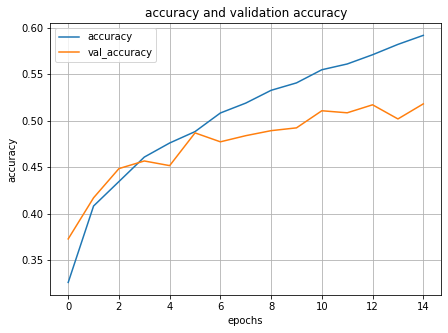

In [238]:
acc = pd.DataFrame({'accuracy':history.history['accuracy'],
                     'val_accuracy':history.history['val_accuracy']})
acc.plot(figsize=(7,5))
plt.xlabel('epochs'), plt.ylabel('accuracy'), plt.title('accuracy and validation accuracy')
plt.grid()

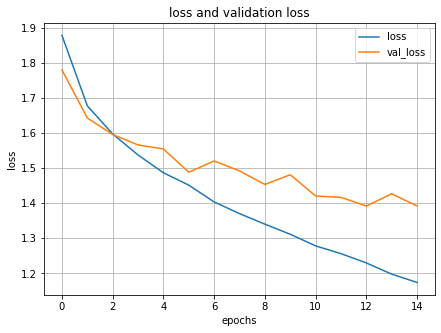

In [239]:
los = pd.DataFrame({'loss':history.history['loss'],
                     'val_loss':history.history['val_loss']})
los.plot(figsize=(7,5))
plt.xlabel('epochs'), plt.ylabel('loss'), plt.title('loss and validation loss')
plt.grid()

Text(42.0, 0.5, 'True label')

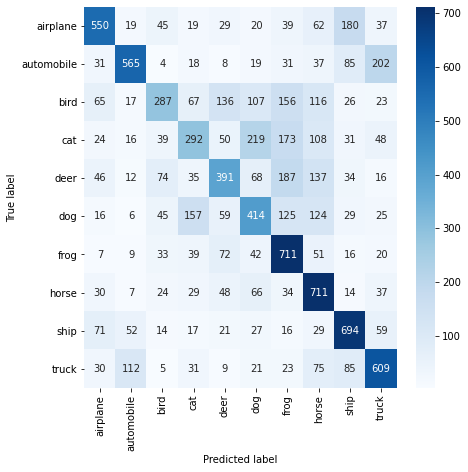

In [240]:
lbls = list(labels.values())
prediction = model.predict(x_test)
matrix  = metrics.confusion_matrix(y_test.argmax(axis=1), prediction.argmax(axis=1))
confusion = pd.DataFrame(matrix, index=lbls, columns=lbls)

plt.figure(figsize=(7,7))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')